Disclaimer:

This report is a dirty hack solution for a quick metrics investigation. It contains a lot of fast written and extremely unflexible code.

It uses the training log file to crunch the present metrics over epochs. 

Should be totally depricated in the future.

In [29]:
import re
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [30]:
file_name = './model/tutby-2_train.log'

with open(file_name, 'r') as f:
    logs = [line.strip() for line in f.readlines()]
if 'Loading' in logs[0]:
    logs = logs[3:]
if 'Epoch' in logs[-1]:
    logs = logs[:-1]
logs = [re.sub(r'\[.*?\] \[info\] \[(.*)?\]', r'\g<1>', log.lower().replace('- ', '').replace('eval', 'val')) 
        for log in logs if log.startswith('[')]

In [37]:
metrics_train = {}
metrics_val = {}
epoch = 0
for log in logs:
    if log.startswith('epoch'):
        epoch += 1
        metrics_train[epoch] = {}
        metrics_val[epoch] = {}
    elif log.startswith('train'):
        if 'roc auc' in log:
            metrics_train[epoch]['auc'] = float(log.split()[-1])
        elif 'metrics' in log:
            for metric_value in log.replace('train metrics: ', '').replace(': ', ':').split():
                metrics_train[epoch][metric_value.split(':')[0]] = float(metric_value.split(':')[1])
    elif log.startswith('val'):
        if 'roc auc' in log:
            metrics_val[epoch]['auc'] = float(log.split()[-1])
        elif 'metrics' in log:
            for metric_value in log.replace('val metrics : ', '').replace(': ', ':').split():
                metrics_val[epoch][metric_value.split(':')[0]] = float(metric_value.split(':')[1])

In [38]:
train_df = pd.DataFrame.from_dict(metrics_train, orient='index')
val_df = pd.DataFrame.from_dict(metrics_val, orient='index')

#### Training metrics

Text(0.5,0,'no. of epoch')

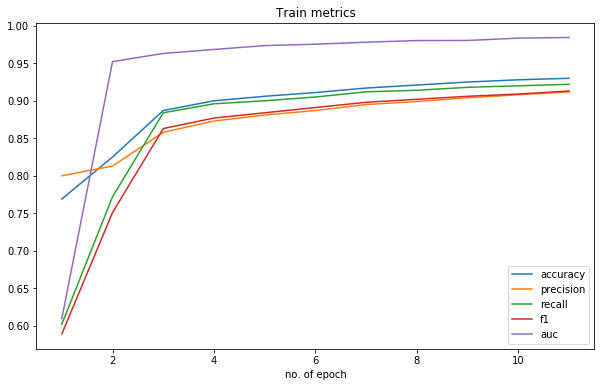

In [39]:
ax = train_df.plot(y=['accuracy', 'precision', 'recall', 'f1', 'auc'], figsize=(10, 6))
ax.set_title('Train metrics')
ax.set_xlabel('no. of epoch')

Text(0.5,0,'no. of epoch')

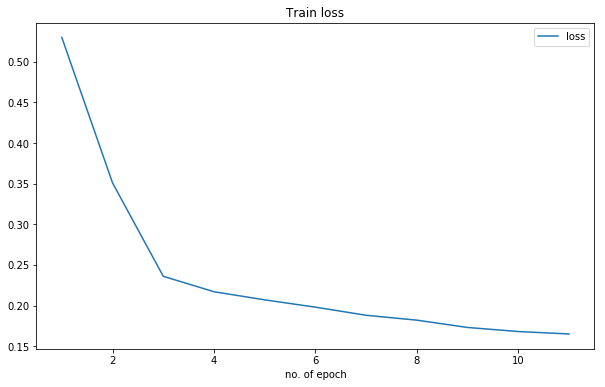

In [40]:
ax = train_df.plot(y=['loss'], figsize=(10, 6))
ax.set_title('Train loss')
ax.set_xlabel('no. of epoch')

Text(0.5,0,'no. of epoch')

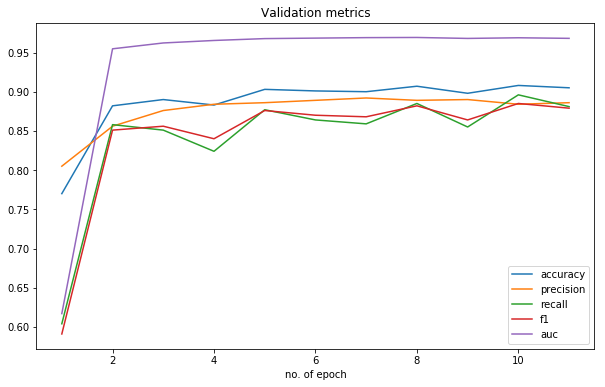

In [41]:
ax = val_df.plot(y=['accuracy', 'precision', 'recall', 'f1', 'auc'], figsize=(10, 6))
ax.set_title('Validation metrics')
ax.set_xlabel('no. of epoch')

Text(0.5,0,'no. of epoch')

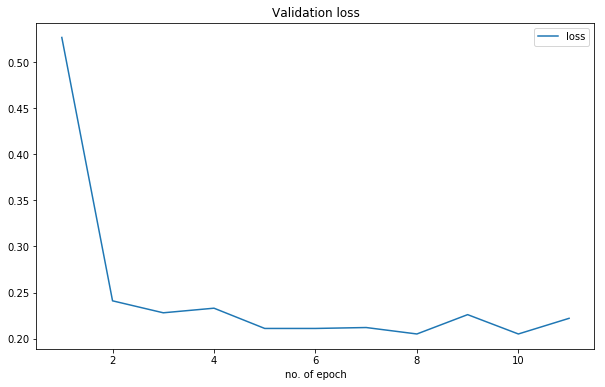

In [42]:
ax = val_df.plot(y=['loss'], figsize=(10, 6))
ax.set_title('Validation loss')
ax.set_xlabel('no. of epoch')